In [20]:
# ECE661 HW2
# Zhengxin Jiang
# jiang839

import cv2 as cv
import numpy as np
import matplotlib . pyplot as plt


### function definetion ###

# The function takes two arrays of points and return the homography
def findHomograpyMatrix(points_1, points_2):
    
    # create a linear system to solve H
    P = np.zeros((9,9))
    
    for i in range(4):
        
        P[2*i, 0] = -points_1[i][0]
        P[2*i, 1] = -points_1[i][1]
        P[2*i, 2] = -1
        P[2*i, 6] = points_1[i][0]*points_2[i][0]
        P[2*i, 7] = points_1[i][1]*points_2[i][0]
        P[2*i, 8] = points_2[i][0]
        
        P[2*i+1, 3] = -points_1[i][0]
        P[2*i+1, 4] = -points_1[i][1]
        P[2*i+1, 5] = -1
        P[2*i+1, 6] = points_1[i][0]*points_2[i][1]
        P[2*i+1, 7] = points_1[i][1]*points_2[i][1]
        P[2*i+1, 8] = points_2[i][1]
    
    P[8, 8] = 1
    
    # take the last col of P inverse
    H = np.linalg.inv(P)[:, 8]
    H = np.reshape(H, (3,3))
    
    return H

    # The function takes two arrays of points and return the homography
def findHomograpy_LeastSquare(points_1, points_2):
    
    P = np.zeros((len(points_1)*2+1, 9))
    
    
    for i in range(len(points_1)):
        
        P[2*i, 0] = -points_1[i][0]
        P[2*i, 1] = -points_1[i][1]
        P[2*i, 2] = -1
        P[2*i, 6] = points_1[i][0]*points_2[i][0]
        P[2*i, 7] = points_1[i][1]*points_2[i][0]
        P[2*i, 8] = points_2[i][0]
        
        P[2*i+1, 3] = -points_1[i][0]
        P[2*i+1, 4] = -points_1[i][1]
        P[2*i+1, 5] = -1
        P[2*i+1, 6] = points_1[i][0]*points_2[i][1]
        P[2*i+1, 7] = points_1[i][1]*points_2[i][1]
        P[2*i+1, 8] = points_2[i][1]
    
    P[-1, -1] = 1
    
    b = np.zeros(len(points_1)*2+1)
    b[-1] = 1     
    
    H = np.linalg.lstsq(P, b, rcond=None)[0]
    H = H/H[-1]
    H = np.reshape(H, (3,3))
    
    return H


# The function takes two arrays of points and return the affine-only homography
def findHomograpyMatrixOnlyAffine(points_1, points_2):
    
    H = findHomograpyMatrix(points_1, points_2)
    H[2][0] = 0
    H[2][1] = 0

    return H

# The function project image1 to image2 using the given homography
def projectImage(img1, img2, H):
    
    new_img = img2.copy()
    
    for i in range(img1.shape[1]):
        for j in range(img1.shape[0]):
            
            # find the coordinate after projection
            proj_coord = H.dot([i, j, 1])
            x_proj = round(proj_coord[0]/proj_coord[2])
            y_proj = round(proj_coord[1]/proj_coord[2])
            
            # replace the projected pixel
            if 0 <= x_proj and x_proj < new_img.shape[1] and 0 <= y_proj and y_proj < new_img.shape[0]:
                new_img[y_proj, x_proj] = img1[j, i]
            
    return new_img

# The function project image1 to image2 using the given homography.
# The pixel is selected by applying H inverse to the projection area.
def projectImage_inverseH(img1, img2, H, area):
    
    new_img = img2.copy()
    
    for i in range(img2.shape[1]):
        for j in range(img2.shape[0]):
            
            if cv.pointPolygonTest(area, (i,j), False) == 1.0:  # check if the pixel is in the PQRS area
                proj_coord = np.linalg.inv(H).dot([i, j, 1])
                x_proj = round(proj_coord[0]/proj_coord[2])
                y_proj = round(proj_coord[1]/proj_coord[2])
                
                # replace the projected pixel
                if 0 <= x_proj and x_proj < img1.shape[1] and 0 <= y_proj and y_proj < img1.shape[0]:
                    new_img[j, i] = img1[y_proj, x_proj]

    return new_img

# The function creates an blank image with the same size as the input image 
def getBlankImage(img):
    
    blankimg = np.zeros(img.shape, dtype=np.uint8)
    
    return blankimg


In [21]:
if __name__ == '__main__' :
    
    # images for task 1
    img_a = cv.imread('hw2images/card1.jpeg')
    img_b = cv.imread('hw2images/card2.jpeg')
    img_c = cv.imread('hw2images/card3.jpeg')
    img_d = cv.imread('hw2images/car.jpg')
    img_a=cv.cvtColor(img_a,cv.COLOR_BGR2RGB)
    img_b=cv.cvtColor(img_b,cv.COLOR_BGR2RGB)
    img_c=cv.cvtColor(img_c,cv.COLOR_BGR2RGB)
    img_d=cv.cvtColor(img_d,cv.COLOR_BGR2RGB)
    
    corners_a = np.array([[526, 283], [630, 1080], [1209, 785], [1226, 202]])
    corners_b = np.array([[325, 250], [224, 843], [854, 1088], [1009, 261]])
    corners_c = np.array([[584, 78], [93, 589], [702, 1181], [1195, 674]])
    corners_d = np.array([[10, 10], [10, img_d.shape[0]-10], [img_d.shape[1]-10, img_d.shape[0]-10], [img_d.shape[1]-10, 10]])
    
    #images for task 2
    img_a_2 = cv.imread('hw2images/monitor1.jpg')
    img_b_2 = cv.imread('hw2images/monitor2.jpg')
    img_c_2 = cv.imread('hw2images/monitor3.jpg')
    img_d_2 = cv.imread('hw2images/razer.jpg')
    img_a_2=cv.cvtColor(img_a_2,cv.COLOR_BGR2RGB)
    img_b_2=cv.cvtColor(img_b_2,cv.COLOR_BGR2RGB)
    img_c_2=cv.cvtColor(img_c_2,cv.COLOR_BGR2RGB)
    img_d_2=cv.cvtColor(img_d_2,cv.COLOR_BGR2RGB)
    
    corners_a_2 = np.array([[493, 281], [222, 989], [1180, 1013], [1479, 517]])
    corners_b_2 = np.array([[464, 284], [186, 895], [1470, 979], [1630, 180]])
    corners_c_2 = np.array([[406, 103], [195, 765], [1411, 1125], [1596, 452]])
    corners_d_2 = np.array([[0, 0], [0, img_d_2.shape[0]], [img_d_2.shape[1], img_d_2.shape[0]], [img_d_2.shape[1], 0]])
    
    
    ### Task 1.1 ###
#     H_da = findHomograpyMatrix(corners_d, corners_a)
#     project_img_da = projectImage_inverseH(img_d, img_a, H_da, corners_a)
    
#     H_db = findHomograpyMatrix(corners_d, corners_b)
#     project_img_db = projectImage_inverseH(img_d, img_b, H_db, corners_b)
    
#     H_dc = findHomograpyMatrix(corners_d, corners_c)
#     project_img_dc = projectImage_inverseH(img_d, img_c, H_dc, corners_c)

    
    corners_a = np.array([[526, 283], [578, 680], [630, 1080], [1209, 785], [1226, 202]])
    corners_d = np.array([[10, 10], [10, img_d.shape[0]//2], [10, img_d.shape[0]-10], [img_d.shape[1]-10, img_d.shape[0]-10], [img_d.shape[1]-10, 10]])
    
    H_da = findHomograpy_LeastSquare(corners_d, corners_a)
    print(H_da)
    project_img_da = projectImage_inverseH(img_d, img_a, H_da, corners_a)
    
    
#     ### Task 1.2 ###  
#     # find homography between ab and bc
#     H_ab = findHomograpyMatrix(corners_a, corners_b)
#     H_bc = findHomograpyMatrix(corners_b, corners_c)
    
#     H_ac = np.dot(H_bc, H_ab)
    
#     mask_img = getBlankImage(img_a)
#     corners_mask = np.array([[0, 0], [0, mask_img.shape[0]], [mask_img.shape[1], mask_img.shape[0]], [mask_img.shape[1], 0]])
#     project_img_ac = projectImage_inverseH(img_a, mask_img, H_ac, corners_mask)


#     ### Task 1.3 ###
#     H_affine_da = findHomograpyMatrixOnlyAffine(corners_d, corners_a)
#     project_img_affine_da = projectImage_inverseH(img_d, img_a, H_affine_da, corners_a)
    
#     H_affine_db = findHomograpyMatrixOnlyAffine(corners_d, corners_b)
#     project_img_affine_db = projectImage_inverseH(img_d, img_b, H_affine_db, corners_b)
    
#     H_affine_dc = findHomograpyMatrixOnlyAffine(corners_d, corners_c)
#     project_img_affine_dc = projectImage_inverseH(img_d, img_c, H_affine_dc, corners_c)
    
    
#     ### Task 2.1 ###
#     H_da_2 = findHomograpyMatrix(corners_d_2, corners_a_2)
#     project_img_da_2 = projectImage_inverseH(img_d_2, img_a_2, H_da_2, corners_a_2)
    
#     H_db_2 = findHomograpyMatrix(corners_d_2, corners_b_2)
#     project_img_db_2 = projectImage_inverseH(img_d_2, img_b_2, H_db_2, corners_b_2)
    
#     H_dc_2 = findHomograpyMatrix(corners_d_2, corners_c_2)
#     project_img_dc_2 = projectImage_inverseH(img_d_2, img_c_2, H_dc_2, corners_c_2)
    
    
#     ### Task 2.2 ###  
#     # find homography between ab and bc
#     H_ab_2 = findHomograpyMatrix(corners_a_2, corners_b_2)
#     H_bc_2 = findHomograpyMatrix(corners_b_2, corners_c_2)
    
#     H_ac_2 = np.dot(H_bc_2, H_ab_2)
    
#     mask_img_2 = getBlankImage(img_a_2)
#     corners_mask_2 = np.array([[0, 0], [0, mask_img_2.shape[0]], [mask_img_2.shape[1], mask_img_2.shape[0]], [mask_img_2.shape[1], 0]])
#     project_img_ac_2 = projectImage_inverseH(img_a_2, mask_img_2, H_ac_2, corners_mask_2)

#     ### Task 2.3 ###
#     H_affine_da_2 = findHomograpyMatrixOnlyAffine(corners_d_2, corners_a_2)
#     project_img_affine_da_2 = projectImage_inverseH(img_d_2, img_a_2, H_affine_da_2, corners_a_2)
    
#     H_affine_db_2 = findHomograpyMatrixOnlyAffine(corners_d_2, corners_b_2)
#     project_img_affine_db_2 = projectImage_inverseH(img_d_2, img_b_2, H_affine_db_2, corners_b_2)
    
#     H_affine_dc_2 = findHomograpyMatrixOnlyAffine(corners_d_2, corners_c_2)
#     project_img_affine_dc_2 = projectImage_inverseH(img_d_2, img_c_2, H_affine_dc_2, corners_c_2)
    

[[1.68379976e+00 3.60537579e-01 5.17158666e+02]
 [2.80719985e-02 1.82762157e+00 2.55876999e+02]
 [6.12182593e-04 3.11295326e-04 1.00000000e+00]]


<Figure size 640x480 with 0 Axes>

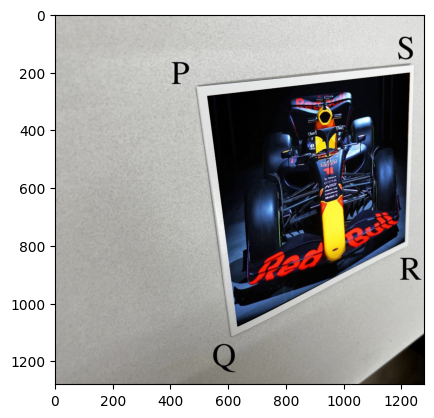

<Figure size 640x480 with 0 Axes>

In [22]:
plt.imshow(project_img_da)
plt.figure()
# plt.imshow(project_img_db)
# plt.figure()
# plt.imshow(project_img_dc)
# plt.figure()

<Figure size 640x480 with 0 Axes>

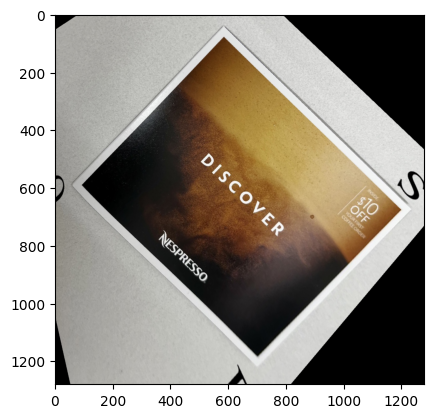

<Figure size 640x480 with 0 Axes>

In [9]:
plt.imshow(project_img_ac)
plt.figure()
# plt.imshow(mask_img)
# plt.figure()

<Figure size 640x480 with 0 Axes>

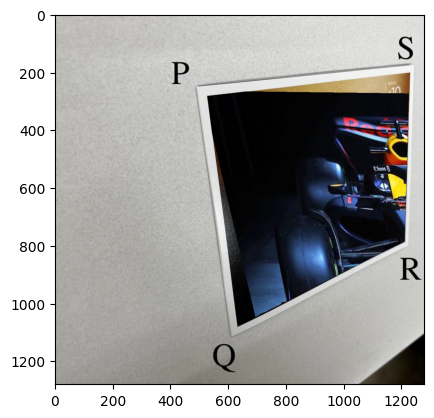

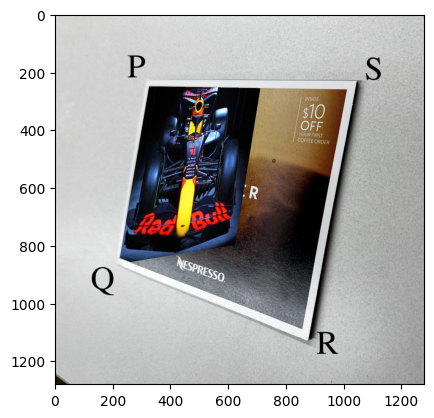

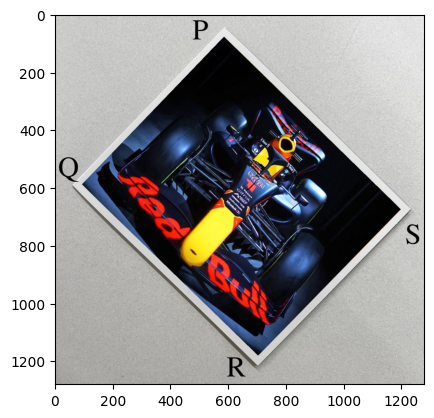

<Figure size 640x480 with 0 Axes>

In [10]:
plt.imshow(project_img_affine_da)
plt.figure()
plt.imshow(project_img_affine_db)
plt.figure()
plt.imshow(project_img_affine_dc)
plt.figure()

<Figure size 640x480 with 0 Axes>

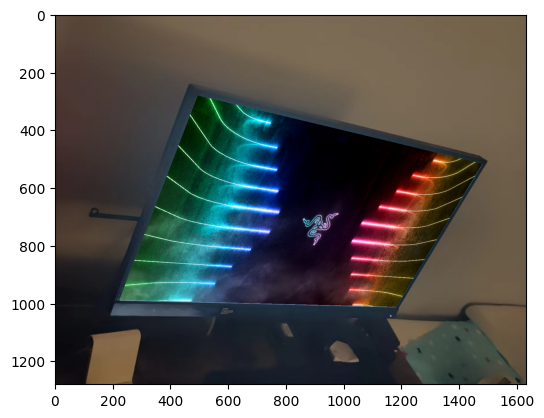

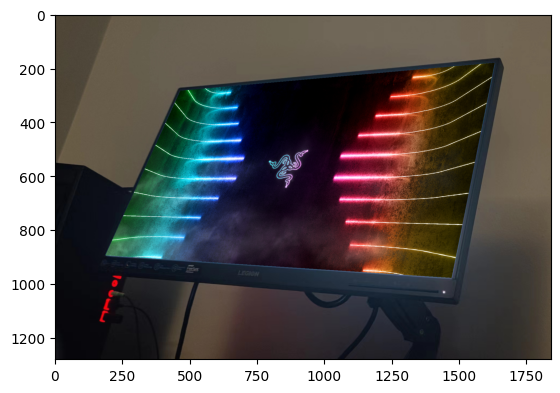

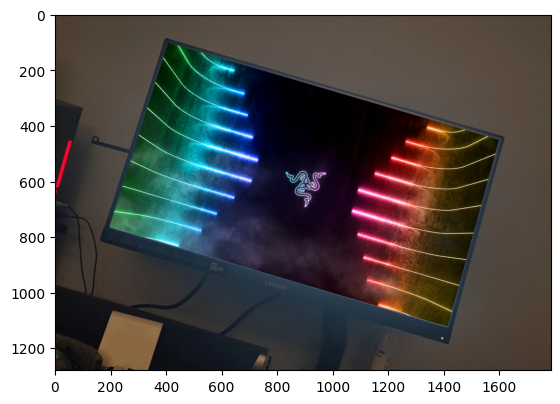

<Figure size 640x480 with 0 Axes>

In [11]:
plt.imshow(project_img_da_2)
plt.figure()
plt.imshow(project_img_db_2)
plt.figure()
plt.imshow(project_img_dc_2)
plt.figure()

<Figure size 640x480 with 0 Axes>

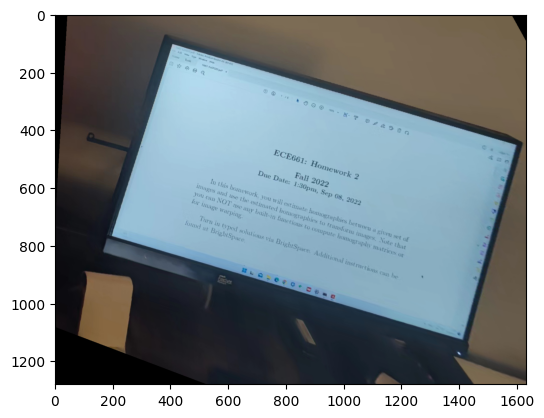

<Figure size 640x480 with 0 Axes>

In [12]:
plt.imshow(project_img_ac_2)
plt.figure()

<Figure size 640x480 with 0 Axes>

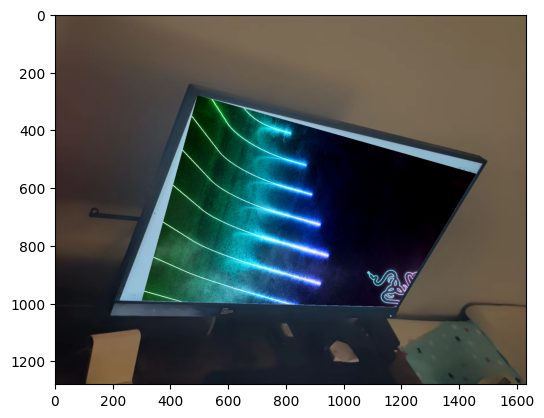

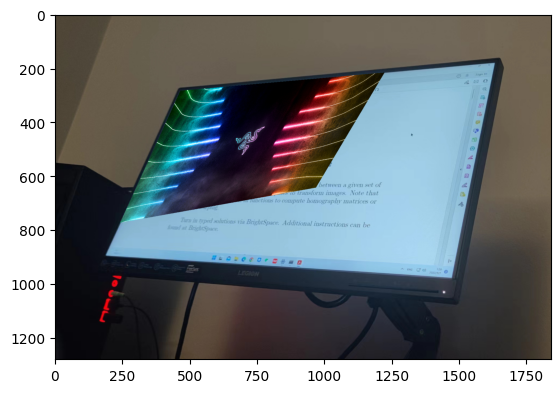

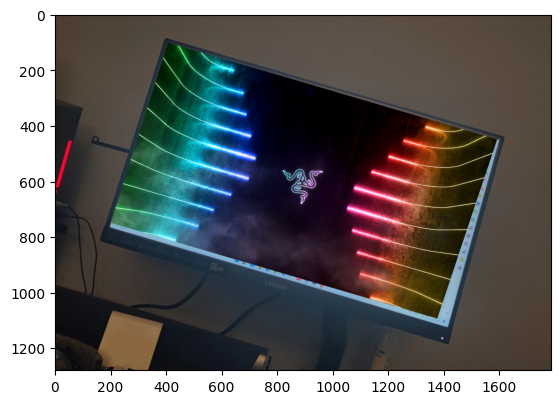

<Figure size 640x480 with 0 Axes>

In [13]:
plt.imshow(project_img_affine_da_2)
plt.figure()
plt.imshow(project_img_affine_db_2)
plt.figure()
plt.imshow(project_img_affine_dc_2)
plt.figure()